# Train a Model and Make Predictions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

sns.set_style("whitegrid")

In [2]:
data = pd.read_excel("./data/bballTrainingData.xlsx", sheet_name='data')
data_train = pd.read_excel("./data/bballTrainingData.xlsx", sheet_name='dataTrain')
data_test = pd.read_excel("./data/bballTrainingData.xlsx", sheet_name='dataTest')

In [3]:
data.head()

,playerID,name,pos,height,weight,GP,minutes,points,oRebounds,dRebounds,...,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
0,abdulma02,Mahmoud Abdul-Rauf,G,73,162,586,26.6689,0.5473,0.0140,0.0555,...,0.0312,0.0029,0.0616,0.0708,0.5083,0.2249,0.0743,0.0673,0.0857,0.0303
1,abdursh01,Julius Abdur-Rahim,F,81,225,830,34.7928,0.5204,0.0647,0.1513,...,0.0284,0.0221,0.0739,0.0805,0.3987,0.1882,0.1712,0.1387,0.0180,0.0053
2,adamsmi01,Michael Adams,G,70,162,334,32.1826,0.4973,0.0201,0.0767,...,0.0495,0.0028,0.0786,0.0629,0.4106,0.1674,0.1396,0.1200,0.1372,0.0426
3,aguirma01,Mark Aguirre,F-G,78,232,243,22.6461,0.5217,0.0494,0.1101,...,0.0247,0.0084,0.0674,0.1050,0.4481,0.2015,0.1359,0.0994,0.0591,0.0193
4,aingeda01,Daniel Ainge,G-F,76,175,383,21.9243,0.4523,0.0223,0.0738,...,0.0367,0.0057,0.0528,0.0968,0.3667,0.1657,0.0760,0.0629,0.1561,0.0581


The normalized (per minute) numeric statistics from the basketball player data set has been divided into a training set dataTrain and a testing set dataTest. We will train a classification model using the training set, then make predictions for the testing set.
A k-nearest neighbor (kNN) model classifies an observation as the same class as the nearest known examples. We can fit a kNN model by passing a DataFrame of data to the fit() function of the [KNeighborsClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier) class.
The second input is the response variable in the DataFrame (that is, the variable we want the model to predict).

In [4]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(data_train.iloc[:, 1:], data_train.iloc[:, 0])

KNeighborsClassifier(n_neighbors=1)

The predict function determines the predicted class of new observations.
The input is the DataFrame of observations, with the same predictor variables as was used to train the model. The output is an array of the predicted class for each observation in the test set.

In [5]:
predicted_pos = knn_model.predict(data_test.iloc[:, 1:])

A commonly-used metric to evaluate a model is the misclassification rate (the proportion of incorrect predictions). This metric is also called the model's loss.

In [6]:
model_loss = 1 - knn_model.score(data_test.iloc[:, 1:], data_test.iloc[:, 0])
model_loss

0.6318681318681318

The loss value indicates that over 60% of the positions were predicted incorrectly. A confusion matrix gives the number of observations from each class that are predicted to be each class. It's commonly visualized by shading the elements according to their value, with the diagonal elements (the correct classifications) shaded in one color and the other elements (the incorrect classifications) in another color. We can visualize a confusion matrix using the [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix) and [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn-heatmap) functions.

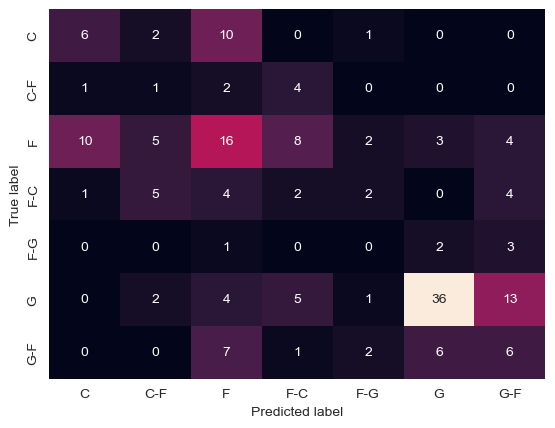

In [7]:
cnfs_mtrx = confusion_matrix(data_test.iloc[:, 0], predicted_pos)
pos_categories = pd.Categorical(data.pos).categories

plt.figure()
sns.heatmap(pd.DataFrame(cnfs_mtrx, columns=pos_categories, index=pos_categories), annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()